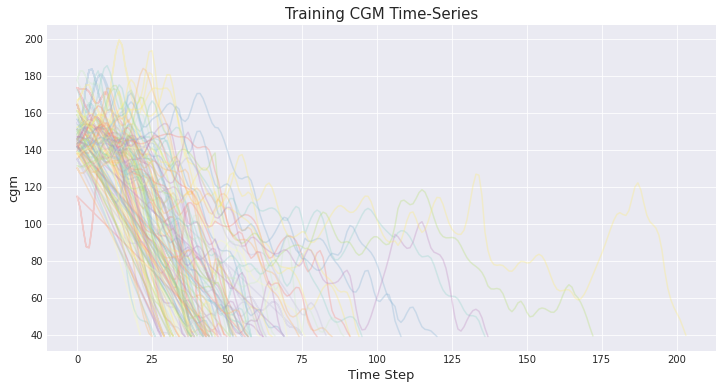

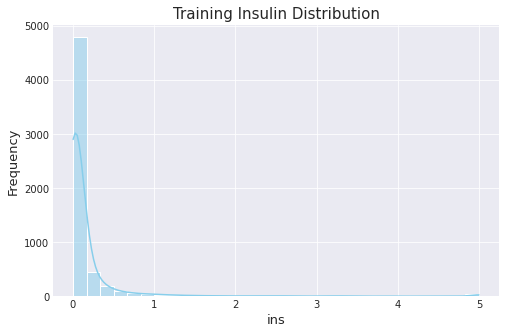

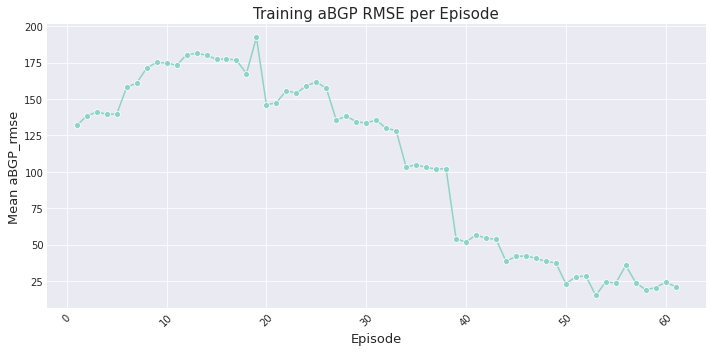

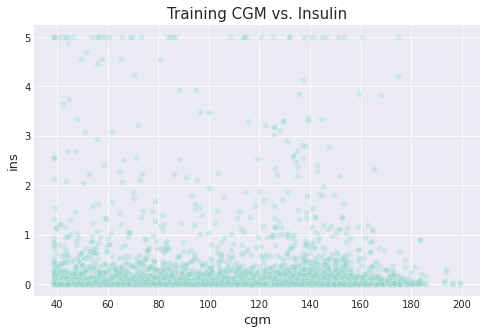

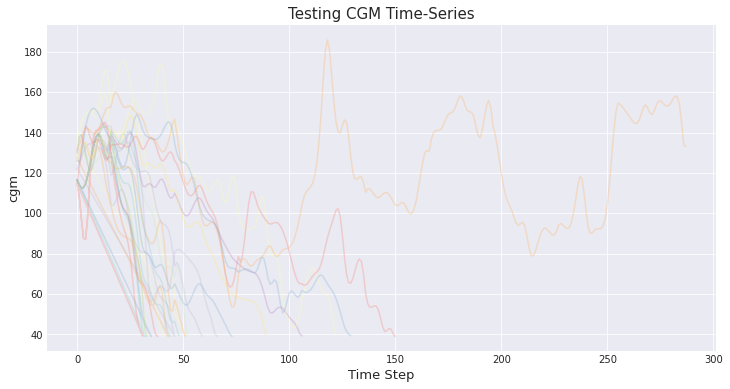

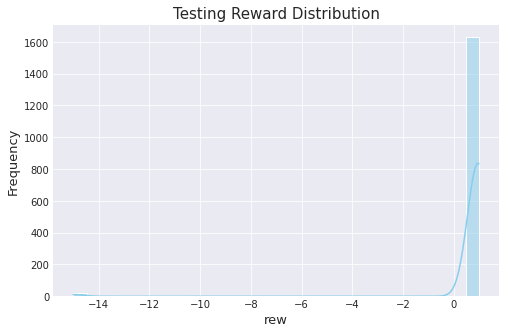

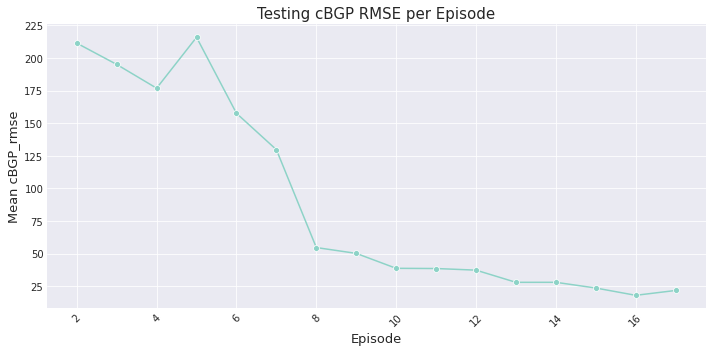

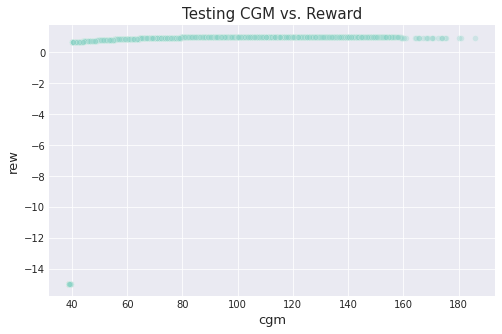

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

def read_and_preprocess_csv(csv_path):
    df = pd.read_csv(csv_path, dtype=str)
    df = df.apply(lambda x: x.str.strip()).replace('', np.nan).apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    return df

def plot_time_series(df, x_col='t', y_col='cgm', group_col='epi', title='CGM Time-Series'):
    plt.figure(figsize=(12, 6))
    for epi in sorted(df[group_col].unique()):
        episode_df = df[df[group_col] == epi]
        plt.plot(episode_df[x_col], episode_df[y_col], alpha=0.3, label=f'Epi {int(epi)}')
    plt.title(title, fontsize=15)
    plt.xlabel('Time Step', fontsize=13)
    plt.ylabel(y_col, fontsize=13)
    plt.show()

def plot_histogram(df, col, title, bins=30):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=bins, kde=True, color='skyblue')
    plt.title(title, fontsize=15)
    plt.xlabel(col, fontsize=13)
    plt.ylabel("Frequency", fontsize=13)
    plt.show()

def plot_episode_metric(df, epi_col='epi', metric_col='reward', title='Episode-wise Reward'):
    grouped = df.groupby(epi_col)[metric_col].mean()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=grouped.index, y=grouped.values, marker='o')
    plt.title(title, fontsize=15)
    plt.xlabel('Episode', fontsize=13)
    plt.ylabel(f'Mean {metric_col}', fontsize=13)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_scatter(df, x_col='cgm', y_col='ins', title='CGM vs. Insulin'):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.3)
    plt.title(title, fontsize=15)
    plt.xlabel(x_col, fontsize=13)
    plt.ylabel(y_col, fontsize=13)
    plt.show()

def plot_boxplot(df, cols, title='Boxplot Analysis'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[cols])
    plt.title(title, fontsize=15)
    plt.ylabel('Values', fontsize=13)
    plt.xticks(rotation=45)
    plt.show()

def plot_heatmap(df, title='Feature Correlation Heatmap'):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title, fontsize=15)
    plt.show()

if __name__ == "__main__":
    base_path = "/home/eoeldroal/G2P2C/results/test/"
    csv_paths = {
        "train_logs": base_path + "training/data/logs_worker_0.csv",
        "train_summary": base_path + "training/data/training_episode_summary_0.csv",
        "test_logs": base_path + "testing/data/logs_worker_5000.csv",
        "test_summary": base_path + "testing/data/testing_episode_summary_5000.csv"
    }

    train_logs = read_and_preprocess_csv(csv_paths["train_logs"])
    train_summary = read_and_preprocess_csv(csv_paths["train_summary"])
    test_logs = read_and_preprocess_csv(csv_paths["test_logs"])
    test_summary = read_and_preprocess_csv(csv_paths["test_summary"])

    # 1️⃣ 시계열 분석 (Training)
    plot_time_series(train_logs, y_col='cgm', title='Training CGM Time-Series')

    # 2️⃣ 히스토그램 (Training 인슐린 투여량)
    plot_histogram(train_logs, col='ins', title='Training Insulin Distribution')

    # 3️⃣ 에피소드별 RMSE (Training)
    plot_episode_metric(train_summary, metric_col='aBGP_rmse', title='Training aBGP RMSE per Episode')

    # 4️⃣ Scatter: 혈당 vs. 인슐린 (Training)
    plot_scatter(train_logs, x_col='cgm', y_col='ins', title='Training CGM vs. Insulin')
    
    # 7️⃣ 시계열 분석 (Testing)
    plot_time_series(test_logs, y_col='cgm', title='Testing CGM Time-Series')

    # 8️⃣ 히스토그램 (Testing 보상 분포)
    plot_histogram(test_logs, col='rew', title='Testing Reward Distribution')

    # 9️⃣ 에피소드별 RMSE (Testing)
    plot_episode_metric(test_summary, metric_col='cBGP_rmse', title='Testing cBGP RMSE per Episode')

    # 🔟 Scatter: 혈당 vs. 보상 (Testing)
    plot_scatter(test_logs, x_col='cgm', y_col='rew', title='Testing CGM vs. Reward')
